# Questions Summary

In [ ]:
!pip install nbmerge

  Preparing metadata (setup.py) ... done
  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6393 sha256=e21b515275c38593aa70f63296b5d4db850d293799a258b7e81fa403174163cc
  Stored in directory: /root/.cache/pip/wheels/ab/6a/28/a33b228ce3eda9a7cc2cfd050b24752d09ac76a13733738df5
Successfully built nbmerge


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Inference
* Q1: relationship between `song length` vs `popularity`

  `*use unique_spotify52kData_df*`

* Q2:  popularity on `explicit` vs ` non-explicit`

  `*use unique_spotify52kData_df*`
  
* Q3: popularity on `major` vs ` minor`

  `*use unique_spotify52kData_df*`

### ML

* Q4: linear regression (y = `popularity` ;  x = `[duration, danceability, energy, loudness, speechiness,
acousticness, instrumentalness, liveness, valence, tempo]`

    `*use unique_spotify52kData_df*`
    * Q4-1: best predictor
    * Q4-2: model assessment
* Q5: multiple regression (y = `popularity`)
    
    `*use unique_spotify52kData_df*`
    * Q5-1: model assessment (COD)
    * Q5-2: compare to Q4, explain improvements(if any) and why
    * Q5-3: Do *regularization* (lasso & ridge) and run again. Assess model (COD), compare with Q4 and explain.
* Q6: PCA

    `*use unique_spotify52kData_df*`

    * Q6-1: how many meaningful principal components? (use elbow criterion or Kaiser criterion)
    * Q6-2: how many proportion of variance accounted?
    * Q6-3: using the principle components, how many clusters identified? (use silhouette)
    * Q6-4: do clusters correspond to genre labels?
* Q7: x = `valence`, y = `key`.

    `*use unique_spotify52kData_df*`
    * Q7-1: use logistic regression classifier, model assessment (AUC)
    * Q7-2: use SVM classifier, model assessment (confusion matrix, f-1 score)
    * Q7-3: which one is better?
* Q8: y = `genre` ;  x = `[duration, danceability, energy, loudness, speechiness,
acousticness, instrumentalness, liveness, valence and tempo]`

    `*use unique_spotify52kData_df*`
    * Q8-1: linear regression (COD) & multiple regression (COD)
    * **[?] Q8-2: principle component (in Q6) with neural network?**

* Q9: recommender systems

    `*use spotify52kData + user explicit?*`
    * **[?] Q9-1: relationship `popularity` & `average star rating`**
    * **[?] Q9-2: 10 greatest hits by popularity based model**
* Q10: recommender systems

    *use spotify52kData + user explicit?*

    * **[?] Q10-1: personalizedm mixtape: 10 songs**
    * **Q10-2: model assessment (?)**

# ML Steps  (Q4 - Q10)
missing value -> standardize -> regression, regularization, PCA

test split -> logistic, SVM, recommender system

---

1. Data Processing:
    
    1.1 impute "missing values"
    1.2 standardize data

2. Run Regression

    2.1 Q4 linear regression

    2.2 Q5 multiple regression w & wo regularization

    2.3 Q6 PCA

3. Train prediction model Q7, Q8-1, Logistic, SVM, recommender system)
    3.1 Q7, Q8-1, Logistic, SVM

4. Recommender System

### Import Libraries & Seeding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


# seeding (as per discord discussion)
np.random.seed(18089736)



### Data Processing

In [ ]:
# Load the data - originally from Spotify API
spotify52kData_df = pd.read_csv('/content/drive/MyDrive/Courses/Fall 2023 IDS/IDS Projects/Capstone/spotify52kData.csv')

### Q4 Linear Regression

Data Processing and explanation:

There are duplicate `track_name` in the data set, meaning there are songs with the same title appear multiple times in the dataset. For example, some duplicates are identical across all columns except the last column (`track_genre`) while there are some with the same `track_name` that appears in different `album_name`.

For Q4 Linear Regression, Q5 Multiple Regression, since we're trying to predict `popularity` based on the selected 10 features, we believe we should handle the duplicates before running the regression.

We believe it is reasonable to consider a "duplicate song" as a song that has the same values in  `['artists', 'album_name', 'track_name', 'duration','key']` columns but are different in other columns. The justification for this is these columns are the "basic traits" of a song, while other columns are somewhat "measurements" of a song, e.g. `danceability`, `speechiness`.
Measurements may contain measurement error that leads to possible duplicates.


After removal, data goes from `52000` rows to `45885` rows.

In [ ]:
'''Removal for duplicates in `spotify52kData`'''

# Define the columns to check for duplicates
duplicate_columns = ['artists', 'album_name', 'track_name', 'duration', 'key']

# Drop duplicates based on the specified columns
unique_spotify52kData_df = spotify52kData_df.drop_duplicates(subset=duplicate_columns, keep='first')

unique_spotify52kData_df

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


In [ ]:
# Substract columns for predictors
feature10_spotify52kData_df = unique_spotify52kData_df.loc[:, ['popularity','duration', 'danceability', 'energy', 'loudness', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] # type(dataframe)
feature10_spotify52kData_df


,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,0.4610,-6.746,0.1430,0.03220,0.000001,0.3580,0.715,87.917
1,55,149610,0.420,0.1660,-17.235,0.0763,0.92400,0.000006,0.1010,0.267,77.489
2,57,210826,0.438,0.3590,-9.734,0.0557,0.21000,0.000000,0.1170,0.120,76.332
3,71,201933,0.266,0.0596,-18.515,0.0363,0.90500,0.000071,0.1320,0.143,181.740
4,82,198853,0.618,0.4430,-9.681,0.0526,0.46900,0.000000,0.0829,0.167,119.949
...,...,...,...,...,...,...,...,...,...,...,...
51995,0,203653,0.819,0.6450,-6.707,0.0481,0.23200,0.000863,0.1780,0.724,94.998
51996,1,212413,0.831,0.8180,-7.827,0.0824,0.02450,0.000319,0.0892,0.819,95.022
51997,0,212413,0.831,0.8180,-7.827,0.0824,0.02450,0.000319,0.0892,0.819,95.022
51998,0,168620,0.727,0.6470,-7.383,0.2800,0.03290,0.000000,0.2460,0.529,159.959


In [ ]:
best_r2 = -1
best_predictor = None

for i in range(1, 11):  # Loop from column 1 to 11 (Python index starts at 0)
    X = feature10_spotify52kData_df.iloc[:, [i]]  # Predictor
    y = feature10_spotify52kData_df.iloc[:, 0]    # Target (popularity)

    X_column_name = feature10_spotify52kData_df.columns[i]
    y_column_name = feature10_spotify52kData_df.columns[0]

    # Linear Regression
    reg = LinearRegression()
    reg.fit(X, y)
    y_pred = reg.predict(X)

    # Calculate R^2 Score
    r2 = r2_score(y, y_pred)
    print(f'{i} R^2 score for {X_column_name}: {r2}')

    # print("\n\n" + "method 2")
    # model = LinearRegression().fit(X, y)
    # y_pred = model.predict(X)
    # r2 = r2_score(y, y_pred)
    # print(f'{i} R^2 score for {X_column_name}: {r2}')

    # Update best predictor and r2  (higher r2 means better predictor)
    if r2 > best_r2:
      best_r2 = r2
      best_predictor = X_column_name

    ''' Notes only
      # Plotting (this will take a long time)
      plt.figure(figsize=(8, 6))
      sns.scatterplot(x=X.iloc[:, 0], y=y, color='blue')
      sns.lineplot(x=X.iloc[:, 0], y=y_pred, color='red')
      plt.title(f'Scatter Plot with Linear Regression: {X_column_name}')
      plt.xlabel(f'{X_column_name}')
      plt.ylabel(f'{y_column_name}')
      plt.show()
    '''

print("best_r2 = " + str(best_r2) + "\n" + "best_predictor = " + str(best_predictor))

1 R^2 score for duration: 0.004571940442307798
2 R^2 score for danceability: 0.002156134430675971
3 R^2 score for energy: 0.005153318772772919
4 R^2 score for loudness: 0.002488041970832522
5 R^2 score for speechiness: 0.003166494314920776
6 R^2 score for acousticness: 0.0013867677840032622
7 R^2 score for instrumentalness: 0.02475862020791264
8 R^2 score for liveness: 0.00295952478150574
9 R^2 score for valence: 0.000579447146201395
10 R^2 score for tempo: 0.00013931989174442716
best_r2 = 0.02475862020791264
best_predictor = instrumentalness


In [ ]:

A = feature10_spotify52kData_df['instrumentalness'].values.reshape(-1,1)
B = feature10_spotify52kData_df['popularity'].values.reshape(-1,1)

model = LinearRegression().fit(A, B)

# Predict and evaluate (higher r^2 means better predictor)
B_pred = model.predict(A)
COD = r2_score(B, B_pred)

# print(B_pred)
print(COD)


0.02475862020791264


### Q5 Multiple Regression

#### Without Regulariztion

In [ ]:
X = feature10_spotify52kData_df.iloc[:, 1:12]  # Columns 1 to 11 as predictors
y = feature10_spotify52kData_df.iloc[:, 0]     # Column 0 as the target (popularity)

multireg = LinearRegression()
multireg.fit(X, y)
y_pred = multireg.predict(X)
r2 = r2_score(y, y_pred)
print(f'R^2 score: {r2}')
rmse = sqrt(mean_squared_error(y, y_pred))
print(f'RMSE: {rmse}')

R^2 score: 0.054207441341046825
RMSE: 20.258913150826377


#### With Regularization

In [ ]:
## test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18089736)

Lasso

In [ ]:
lasso_cv = LassoCV(alphas = np.logspace(-6, 6, 13))  # generates 13 numbers between 10^(-6) and 10^6

lasso_cv.fit(X_train, y_train)

# Optimal alpha
optimal_alpha_lasso = lasso_cv.alpha_
print(f'Optimal alpha for Lasso: {optimal_alpha_lasso}')

# Evaluate on test data
y_pred_lasso = lasso_cv.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso R^2 score: {r2_lasso}')
rmse_lasso = sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f'Lasso RMSE: {rmse_lasso}')

Optimal alpha for Lasso: 0.0001
Lasso R^2 score: 0.05302642048303452
Lasso RMSE: 20.22564807766997


Ridge

In [ ]:
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))  # generates 13 numbers between 10^(-6) and 10^6
ridge_cv.fit(X_train, y_train)

# Optimal alpha
optimal_alpha_ridge = ridge_cv.alpha_
print(f'Optimal alpha for Ridge: {optimal_alpha_ridge}')

# Evaluate on test data
y_pred_ridge = ridge_cv.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge R^2 score: {r2_ridge}')
rmse_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Ridge RMSE: {rmse_ridge}')

Optimal alpha for Ridge: 10.0
Ridge R^2 score: 0.05302573889583395
Ridge RMSE: 20.225655356405444


### Q6 PCA & Clusters (silhouette)

10 features: `[duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo]`


Q6-1: how many meaningful principal components? (use elbow criterion or Kaiser criterion)

Q6-2: how many proportion of variance accounted?

Q6-3: using the principle components, how many clusters identified? (use silhouette)

Q6-4: do clusters correspond to genre labels?

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to standardize the dataset’s features onto a unit scale (mean = 0 and variance = 1).

In [ ]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extracting the features
x = unique_spotify52kData_df.loc[:, features].values # type = numpy.ndarray

# Standardizing the features
x = StandardScaler().fit_transform(x)


[0.2733881  0.16173598 0.13845787 0.0979588  0.08752094 0.08148307
 0.06782686 0.0471572  0.03131337 0.01315782]


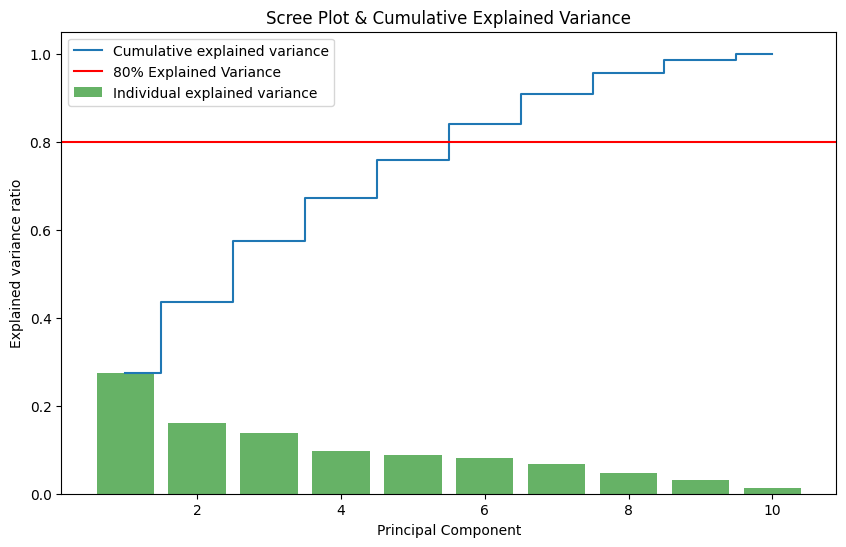

array([0.2733881 , 0.43512407, 0.57358194, 0.67154074, 0.75906168,
       0.84054475, 0.90837161, 0.95552881, 0.98684218, 1.        ])

In [ ]:
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2', 'pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
explained_variances = pca.explained_variance_ratio_

# Calculating cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variances)

print(explained_variances) # sum = 1

# Creating a plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variances, alpha=0.6, color='g', label='Individual explained variance')
plt.step(range(1, 11), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Explained Variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.legend(loc='best')
plt.show()

cumulative_explained_variance  # Return this for further analysis


* The Elbow Method: From the scree plot, you can see a notable 'elbow' around the 5th principal component.
* Variance Accounted: 75%

Cluster Identified

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

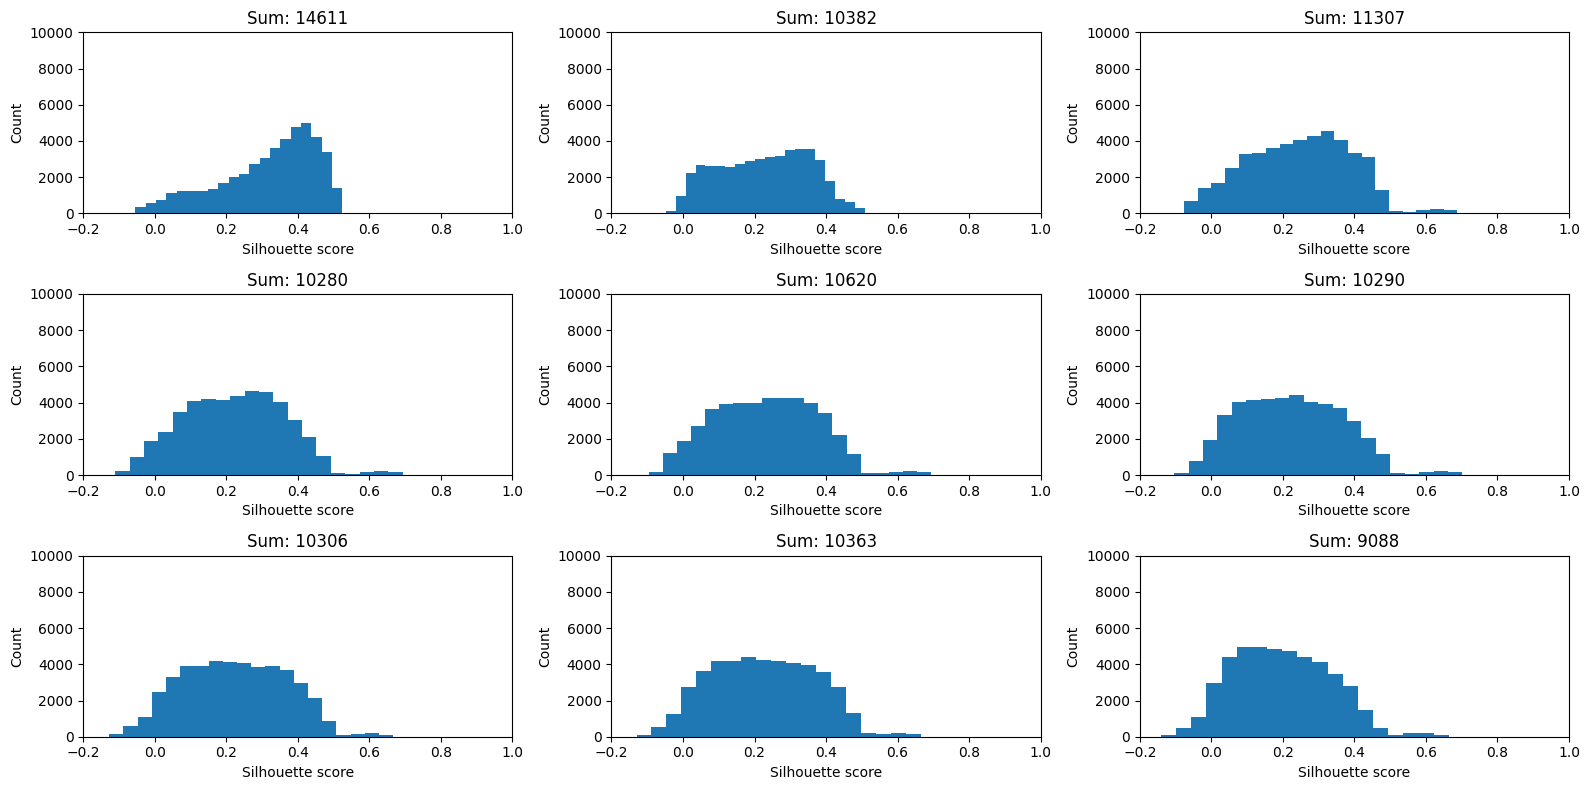

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline


features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

features_pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=5))]) # reducing the dimensionality of the data to 2 principal components
features_processed = features_pca_pipeline.fit_transform(unique_spotify52kData_df.loc[:, features])

numClusters = 10
Q = np.empty([numClusters,1])*np.NaN # init container to store sums


# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii), random_state=18089736).fit(features_processed) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(features_processed,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1)
    plt.hist(s,bins=20)
    plt.xlim(-0.2,1)
    plt.ylim(0,10000)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding


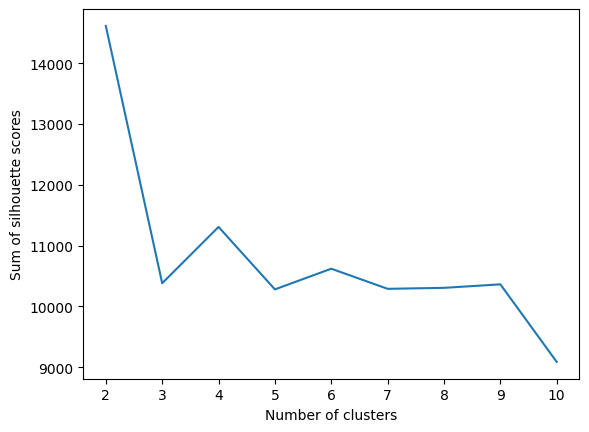

In [ ]:
plt.plot(np.linspace(2,11,10),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

As per above graph, the peak of the silhouette scores for optimal clustering lies in 2.

### Q7 Logistic Regression & SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [ ]:
X = unique_spotify52kData_df[['valence']]  # Predictor
y = unique_spotify52kData_df['mode']  # Target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18089736)

Logistic Regression

0.516838652450368


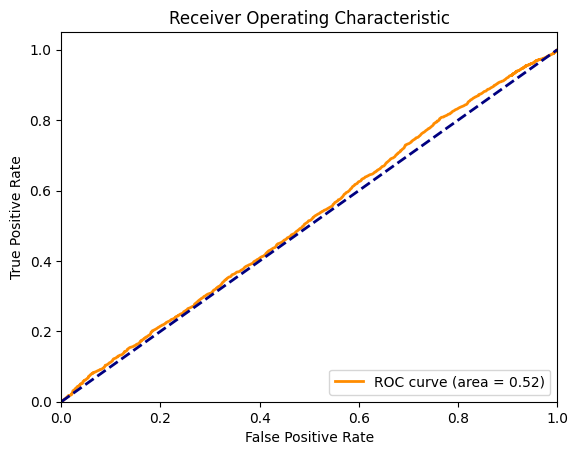

In [ ]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict probabilities
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


SVM

In [ ]:
# Train the Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6279830009807127

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3414
           1       0.63      1.00      0.77      5763

    accuracy                           0.63      9177
   macro avg       0.31      0.50      0.39      9177
weighted avg       0.39      0.63      0.48      9177


Confusion Matrix:
 [[   0 3414]
 [   0 5763]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Features list
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


# Target variable
y = unique_spotify52kData_df['mode']

# DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'Logistic_Regression_AUC'])

for feature in features:
    # Using one feature at a time
    X = unique_spotify52kData_df[[feature]]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18089736)

    # Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    log_reg_acc = log_reg.score(X_test, y_test)  # Accuracy of logistic regression
    # Predict probabilities
    y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

    # Calculate ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Append results to the DataFrame
    results_df = results_df.append({'Feature': feature,
                                    'Logistic_Regression_AUC': roc_auc}, ignore_index=True)

# Print the results
print(results_df)

<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed

            Feature  Logistic_Regression_AUC
0          duration                 0.473642
1      danceability                 0.541917
2            energy                 0.548534
3          loudness                 0.527448
4       speechiness                 0.564836
5      acousticness                 0.557890
6  instrumentalness                 0.539263
7          liveness                 0.514153
8           valence                 0.516839
9             tempo                 0.509461


<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,


### Q8 Can you predict genre by using the 10 song features from question 4 directly or the principal components you extracted in question 6 with a neural network? How well does this work?

Epoch 1/100
3671/3671 [==============================] - 18s 4ms/step - loss: 2.9314 - accuracy: 0.2106
Epoch 2/100
3671/3671 [==============================] - 9s 2ms/step - loss: 2.6954 - accuracy: 0.2593
Epoch 3/100
3671/3671 [==============================] - 8s 2ms/step - loss: 2.6363 - accuracy: 0.2772
Epoch 4/100
3671/3671 [==============================] - 9s 3ms/step - loss: 2.5956 - accuracy: 0.2865
Epoch 5/100
3671/3671 [==============================] - 8s 2ms/step - loss: 2.5699 - accuracy: 0.2901
Epoch 6/100
3671/3671 [==============================] - 10s 3ms/step - loss: 2.5488 - accuracy: 0.2967
Epoch 7/100
3671/3671 [==============================] - 7s 2ms/step - loss: 2.5323 - accuracy: 0.3012
Epoch 8/100
3671/3671 [==============================] - 10s 3ms/step - loss: 2.5205 - accuracy: 0.3033
Epoch 9/100
3671/3671 [==============================] - 8s 2ms/step - loss: 2.5081 - accuracy: 0.3069
Epoch 10/100
3671/3671 [==============================] - 9s 3ms/step 

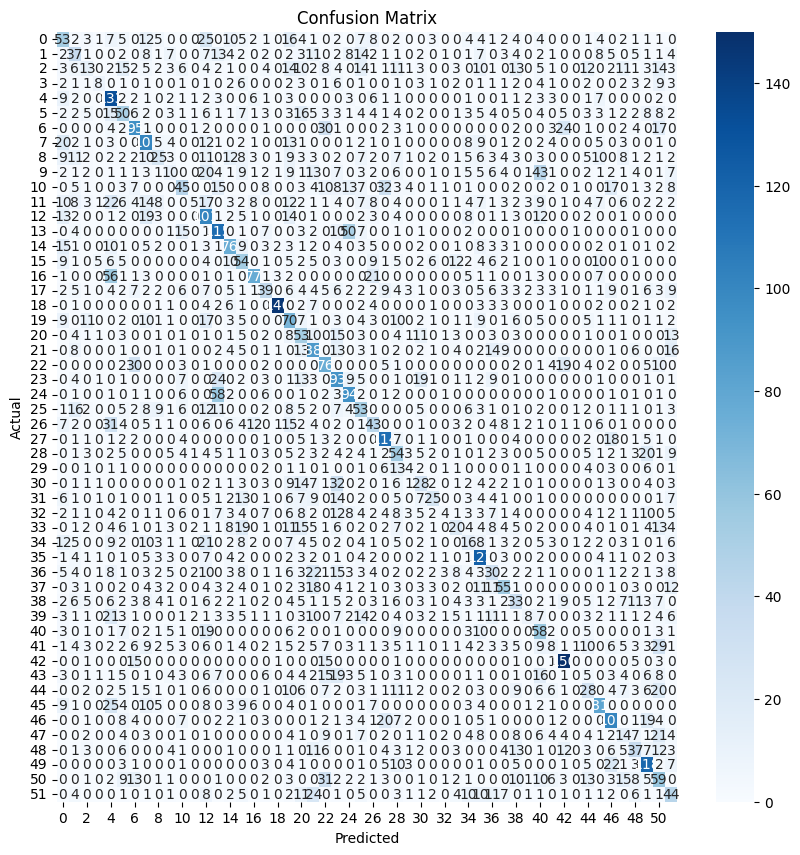

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Seeding
np.random.seed(18089736)
tf.random.set_seed(18089736)

# Load the data
df = pd.read_csv('/content/drive/MyDrive/IDS Projects/Capstone/spotify52kData.csv')

duplicate_columns = ['artists', 'album_name', 'track_name', 'duration', 'key']
unique_spotify52kData_df = df.drop_duplicates(subset=duplicate_columns, keep='first')

# Selecting features and target
features = unique_spotify52kData_df[['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
target = unique_spotify52kData_df['track_genre']

# Encode the target variable
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(target)
# Convert encoded labels to one hot encoding
target_one_hot = to_categorical(encoded_target)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(features, target_one_hot, test_size = 0.2, random_state = 0)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network Model
model = Sequential([
    Dense(64, input_shape=(10,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100}')

# Generate and Plot Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



### Q9 In recommender systems, the popularity based model is an important baseline. We have a two part question in this regard:

#### a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for?

# Inference Steps (Q1 - Q3)

### Q1 Inference: Song Length and Popularity: 1) Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<ipython-input-6-992828e6fd48>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_spotify52kData_df['duration_min'] = unique_spotify52kData_df['duration'] / 60000


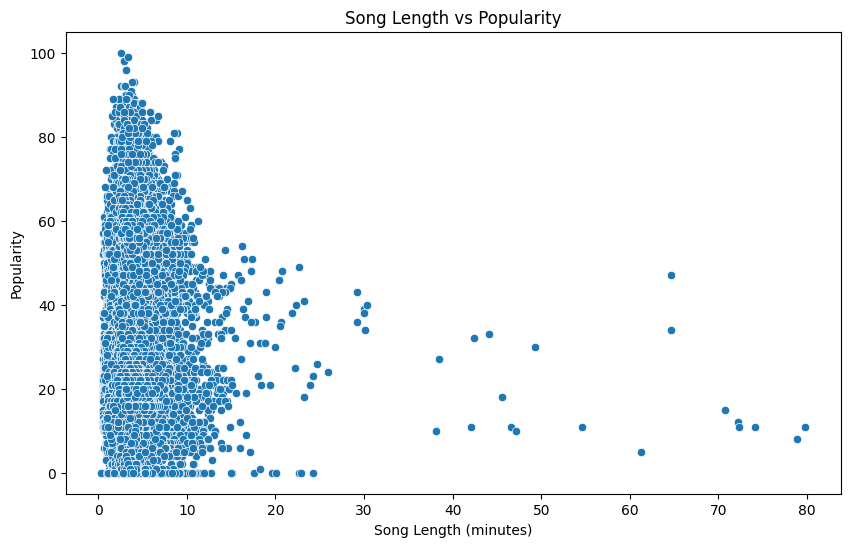

Correlation coefficient: -0.06761612560852313
The correlation is statistically significant.
There is a negative relationship between song length and popularity.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the data
df = pd.read_csv('/content/drive/MyDrive/IDS Projects/Capstone/spotify52kData.csv')

# Remove duplicates
duplicate_columns = ['artists', 'album_name', 'track_name', 'duration', 'key']
unique_spotify52kData_df = df.drop_duplicates(subset=duplicate_columns, keep='first')

# Converting to mins
unique_spotify52kData_df['duration_min'] = unique_spotify52kData_df['duration'] / 60000

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=unique_spotify52kData_df)
plt.title('Song Length vs Popularity')
plt.xlabel('Song Length (minutes)')
plt.ylabel('Popularity')
plt.show()

# Calculating Pearson correlation
correlation, p_value = pearsonr(unique_spotify52kData_df['duration_min'], unique_spotify52kData_df['popularity'])

# Showing results
print(f"Correlation coefficient: {correlation}")
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Interpretation
if correlation > 0:
    print("There is a positive relationship between song length and popularity.")
elif correlation < 0:
    print("There is a negative relationship between song length and popularity.")
else:
    print("There is no linear relationship between song length and popularity.")


### Q2 popularity on explicit vs non-explicit: Are explicitly rated songs more popular than songs that are not explicit?

Levene’s Test for Equality of Variances
Statistics=35.424, p=0.000

Variances are not similar. Using Welch t-test.

Test Result:
T-statistic: 9.05145703058167
P-value: 1.8488170385781355e-19


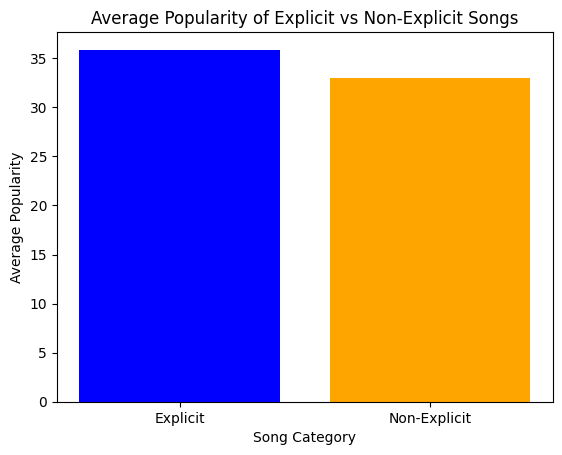

In [8]:
import pandas as pd
from scipy.stats import ttest_ind, levene
import matplotlib.pyplot as plt


# Divide the dataset into explicit and non-explicit songs
explicit_songs = unique_spotify52kData_df[unique_spotify52kData_df['explicit'] == 1]['popularity']
non_explicit_songs = unique_spotify52kData_df[unique_spotify52kData_df['explicit'] == 0]['popularity']

# Calculate average popularity for each category
avg_popularity_explicit = explicit_songs.mean()
avg_popularity_non_explicit = non_explicit_songs.mean()

# Check for equality of variances (Levene's Test)
stat, p_value = levene(explicit_songs, non_explicit_songs)
print('Levene’s Test for Equality of Variances')
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

# Decide which test to use based on the Levene's Test result
if p_value > 0.05:
    print('\nVariances are similar. Using Independent Samples t-test.')
    t_stat, p_value = ttest_ind(explicit_songs, non_explicit_songs, equal_var=True)
else:
    print('\nVariances are not similar. Using Welch t-test.')
    t_stat, p_value = ttest_ind(explicit_songs, non_explicit_songs, equal_var=False)

print(f'\nTest Result:\nT-statistic: {t_stat}\nP-value: {p_value}')

# Plotting the bar chart
plt.bar(['Explicit', 'Non-Explicit'], [avg_popularity_explicit, avg_popularity_non_explicit], color=['blue', 'orange'])
plt.xlabel('Song Category')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Explicit vs Non-Explicit Songs')
plt.show()


### Q3 popularity on major vs minor: Are songs in major key more popular than songs in minor key?

Levene’s Test for Equality of Variances
Statistics=37.861, p=0.000

Variances are not similar. Using Welch t-test.

Test Result:
T-statistic: -5.279944298176776
P-value: 1.299836437712411e-07


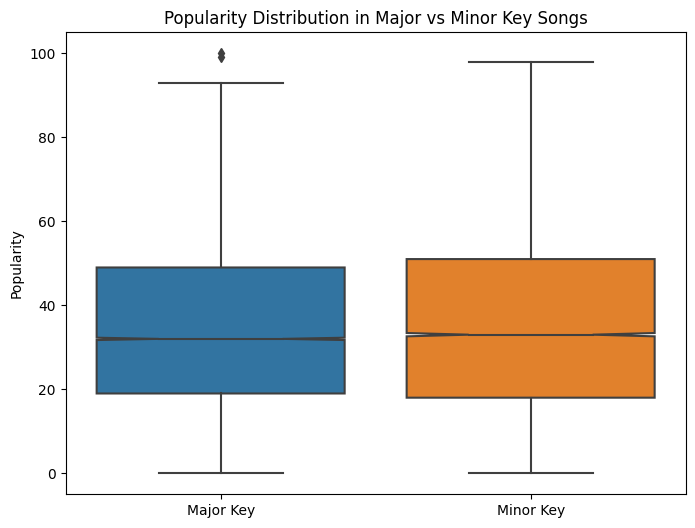

In [9]:
import pandas as pd
from scipy.stats import levene, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns


# Divide the dataset into major and minor key songs
major_key_songs = unique_spotify52kData_df[unique_spotify52kData_df['mode'] == 1]['popularity']
minor_key_songs = unique_spotify52kData_df[unique_spotify52kData_df['mode'] == 0]['popularity']

# Check for equality of variances (Levene's Test)
stat, p_value = levene(major_key_songs, minor_key_songs)
print('Levene’s Test for Equality of Variances')
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

# Choose the test based on the equality of variances
if p_value > 0.05:
    print('\nVariances are similar. Using Independent Samples t-test.')
    t_stat, p_value = ttest_ind(major_key_songs, minor_key_songs, equal_var=True)
else:
    print('\nVariances are not similar. Using Welch t-test.')
    t_stat, p_value = ttest_ind(major_key_songs, minor_key_songs, equal_var=False)

# Showing the results
print(f'\nTest Result:\nT-statistic: {t_stat}\nP-value: {p_value}')

# Creating the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[major_key_songs, minor_key_songs], notch=True)
plt.xticks([0, 1], ['Major Key', 'Minor Key'])
plt.ylabel('Popularity')
plt.title('Popularity Distribution in Major vs Minor Key Songs')
plt.show()